In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="2"


In [3]:
# there are two environments(debug and prod). From where you want to fetch the code and data? 
DEBUG=False

In [4]:
%run ./nb_core/root_dirs.ipynb
setup_syspath_disentangle(DEBUG)
%run ./nb_core/disentangle_imports.ipynb

DATA_ROOT:	 /group/jug/ashesh/data/
CODE_ROOT:	 /home/ashesh.ashesh/


In [5]:
# 'stats_'+'_'.join(ckpt_dir.split('/')[-4:]) + '.pkl'

In [6]:
ckpt_dir = "/home/ashesh.ashesh/training/disentangle/2311/D17-M3-S0-L0/4"
# 211/D3-M3-S0-L0/0
# 2210/D3-M3-S0-L0/128
# 2210/D3-M3-S0-L0/129

In [7]:
# !ls /home/ubuntu/ashesh/training/disentangle/2209/D3-M9-S0-L0/1

In [8]:
dtype = int(ckpt_dir.split('/')[-2].split('-')[0][1:])

In [9]:
dtype

17

In [10]:
if DEBUG:
    if dtype == DataType.CustomSinosoid:
        data_dir = f'{DATA_ROOT}/sinosoid/'
    elif dtype == DataType.OptiMEM100_014:
        data_dir = f'{DATA_ROOT}/microscopy/'
else:
    if dtype in [DataType.CustomSinosoid, DataType.CustomSinosoidThreeCurve]:
        data_dir = f'{DATA_ROOT}/sinosoid_without_test/sinosoid/'
    elif dtype == DataType.OptiMEM100_014:
        data_dir = f'{DATA_ROOT}/microscopy/'
    elif dtype == DataType.Prevedel_EMBL:
        data_dir = f'{DATA_ROOT}/Prevedel_EMBL/PKG_3P_dualcolor_stacks/NoAverage_NoRegistration/'
    elif dtype == DataType.AllenCellMito:
        data_dir = f'{DATA_ROOT}/allencell/2017_03_08_Struct_First_Pass_Seg/AICS-11/'
    elif dtype == DataType.SeparateTiffData:
        data_dir = f'{DATA_ROOT}/ventura_gigascience'
    elif dtype == DataType.SemiSupBloodVesselsEMBL:
        data_dir = f'{DATA_ROOT}/EMBL_halfsupervised/Demixing_3P'
    elif dtype == DataType.Pavia2VanillaSplitting:
        data_dir = f'{DATA_ROOT}/pavia2'
    elif dtype == DataType.ExpansionMicroscopyMitoTub:
        data_dir = f'{DATA_ROOT}/expansion_microscopy_Nick/'
    elif dtype == DataType.ShroffMitoEr:
        data_dir = f'{DATA_ROOT}/shrofflab/'
    elif dtype == DataType.HTIba1Ki67:
        data_dir = f'{DATA_ROOT}/Stefania/20230327_Ki67_and_Iba1_trainingdata/'
    elif dtype == DataType.BioSR_MRC:
        data_dir = f'{DATA_ROOT}/BioSR/'
    elif dtype == DataType.TavernaSox2Golgi:
        data_dir = f'{DATA_ROOT}/TavernaSox2Golgi/'
        
#     2720*2720: microscopy dataset.

image_size_for_grid_centers = 32
mmse_count = 1
custom_image_size = 64



batch_size = 8
num_workers = 4
COMPUTE_LOSS = False
use_deterministic_grid = None
threshold = None # 0.02
compute_kl_loss = False
evaluate_train = False# inspect training performance
eval_datasplit_type = DataSplitType.Test
val_repeat_factor = None
psnr_type = 'range_invariant' #'simple', 'range_invariant'

In [11]:
%run ./nb_core/config_loader.ipynb

data:
  background_quantile: 0.0
  clip_background_noise_to_zero: false
  clip_percentile: 0.995
  data_type: 17
  deterministic_grid: false
  grid_size: 32
  image_size: 64
  input_is_sum: false
  multiscale_lowres_count: null
  normalized_input: true
  padding_mode: reflect
  padding_value: null
  randomized_channels: false
  sampler_type: 0
  skip_normalization_using_mean: false
  subdset_type: 0
  target_separate_normalization: false
  train_aug_rotate: false
  use_one_mu_std: true
  val_grid_size: 32
datadir: /group/jug/ashesh/data/TavernaSox2Golgi/
exptname: 2311/D17-M3-S0-L0/4
git:
  branch: master
  changedFiles: []
  latest_commit: 0f3f22cc8e70c02c0f2531d6d59bbf077fb9af44
  untracked_files: []
hostname: gnode02
loss:
  free_bits: 0.0
  kl_annealing: false
  kl_annealtime: 10
  kl_min: 1.0e-07
  kl_start: -1
  kl_weight: 1
  loss_type: 0
model:
  analytical_kl: false
  decoder:
    batchnorm: true
    blocks_per_layer: 1
    conv2d_bias: true
    dropout: 0.1
    multiscale_ret

In [12]:
# config.model.decoder

In [13]:
from disentangle.core.sampler_type import SamplerType
from disentangle.core.loss_type import LossType
from disentangle.data_loader.ht_iba1_ki67_rawdata_loader import SubDsetType
# from disentangle.core.lowres_merge_type import LowresMergeType
from disentangle.data_loader.multifile_raw_dloader import SubDsetType

with config.unlocked():
    config.data.subdset_type = SubDsetType.OneChannel
    config.model.skip_nboundary_pixels_from_loss = None
    if config.model.model_type == ModelType.UNet and 'n_levels' not in config.model:
        config.model.n_levels = 4
    if config.data.sampler_type == SamplerType.NeighborSampler:
        config.data.sampler_type = SamplerType.DefaultSampler
        config.loss.loss_type = LossType.Elbo
        config.data.grid_size = config.data.image_size
    if 'ch1_fpath_list' in config.data:
        config.data.ch1_fpath_list = config.data.ch1_fpath_list[:1]
        config.data.mix_fpath_list = config.data.mix_fpath_list[:1]
    if config.data.data_type == DataType.Pavia2VanillaSplitting:
        if 'channel_2_downscale_factor' not in config.data:
            config.data.channel_2_downscale_factor = 1
    if config.model.model_type == ModelType.UNet and 'init_channel_count' not in config.model:
        config.model.init_channel_count = 64
    
    if 'skip_receptive_field_loss_tokens' not in config.loss:
        config.loss.skip_receptive_field_loss_tokens = []
    
    if dtype == DataType.HTIba1Ki67:
        config.data.subdset_type = SubDsetType.Iba1Ki64
        config.data.empty_patch_replacement_enabled = False
    
    if 'lowres_merge_type' not in config.model.encoder:
        config.model.encoder.lowres_merge_type = 0

In [14]:
%run ./nb_core/disentangle_setup.ipynb


<class 'disentangle.data_loader.multifile_dset.MultiFileDset'>
Loaded from OneChannel /group/jug/ashesh/data//TavernaSox2Golgi/ 121
[SingleFileDset] Sz:64 Train:1 N:1 NumPatchPerN:1024 NormInp:True SingleNorm:True Rot:False RandCrop:False Q:0.995 SummedInput:False ReplaceWithRandSample:False BckQ:0.0
MultiFileDset avg height: 1024, avg width: 1024, count: 121
Loaded from OneChannel /group/jug/ashesh/data//TavernaSox2Golgi/ 15
[SingleFileDset] Sz:64 Train:0 N:1 NumPatchPerN:1024 NormInp:True SingleNorm:True Rot:False RandCrop:False Q:0.995 SummedInput:False ReplaceWithRandSample:False BckQ:0.0
MultiFileDset avg height: 1024, avg width: 1024, count: 15

config.pkl
[3, 3] [1, 1]
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:0 
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:0 
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:0 
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:0 
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[TopDownLayer] normalize_latent_factor:1.0
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[TopDownLayer] 

In [15]:
len(train_dset)

123904

In [16]:
if config.data.multiscale_lowres_count is not None and custom_image_size is not None:
    model.reset_for_different_output_size(custom_image_size)

In [17]:
# if config.model.model_type not in [ModelType.UNet, ModelType.BraveNet]:
#     with torch.no_grad():
#         inp, tar = val_dset[0][:2]
#         out, td_data = model(torch.Tensor(inp[None]).cuda())
#         print(td_data['z'][-1].shape)
#         print(out.shape)

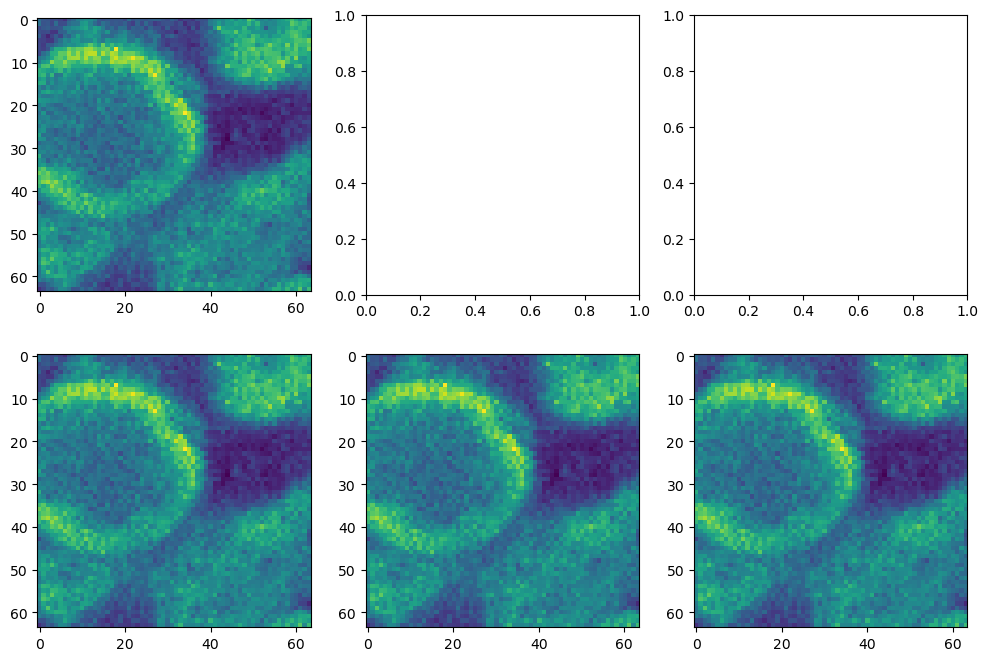

In [18]:
idx = np.random.randint(len(val_dset))
inp_tmp, tar_tmp, *_ = val_dset[idx]
ncols = max(len(inp_tmp),3)
nrows = 2
_,ax = plt.subplots(figsize=(4*ncols,4*nrows),ncols=ncols,nrows=nrows)
for i in range(len(inp_tmp)):
    ax[0,i].imshow(inp_tmp[i])

ax[1,0].imshow(tar_tmp[0]+tar_tmp[1])
ax[1,1].imshow(tar_tmp[0])
ax[1,2].imshow(tar_tmp[1])


In [19]:
from disentangle.analysis.stitch_prediction import stitch_predictions
from disentangle.analysis.mmse_prediction import get_dset_predictions
# from disentangle.analysis.stitch_prediction import get_predictions as get_dset_predictions

pred_tiled, rec_loss, logvar, patch_psnr_tuple = get_dset_predictions(model, val_dset,batch_size,
                                               num_workers=num_workers,
                                               mmse_count=mmse_count,
                                                model_type = config.model.model_type,
                                              )
tmp = np.round([x.item() for x in patch_psnr_tuple],2)
print('Patch wise PSNR, as computed during training', tmp,np.mean(tmp) )

100%|██████████| 1920/1920 [00:37<00:00, 50.75it/s]


Patch wise PSNR, as computed during training [20.6  20.73] 20.665


In [20]:
np.mean(rec_loss)

9.623679

In [21]:
# Patch wise PSNR, as computed during training [ 4.71 23.01] 13.860000000000001


In [22]:
len(val_dset)

15360

In [23]:
idx_list = np.where(logvar.squeeze() < -6)[0]
if len(idx_list) > 0:
    plt.imshow(val_dset[idx_list[0]][1][1])

In [24]:
len(val_dset)

15360

/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

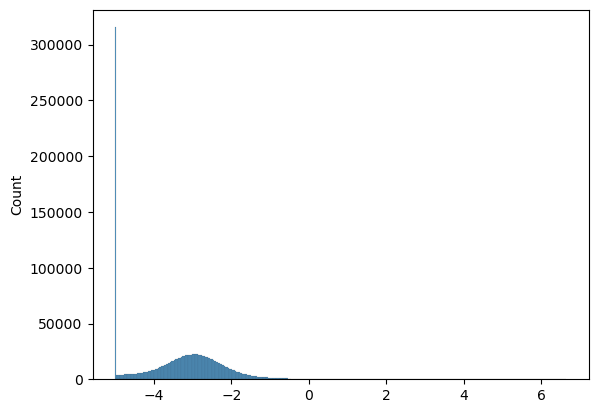

In [25]:
import seaborn as sns
sns.histplot(logvar[::50].squeeze().reshape(-1,))

In [26]:
print(np.quantile(rec_loss, [0,0.01,0.5, 0.9,0.99,0.999,1]).round(2))

[-1.38 -1.24  7.39 21.25 36.99 71.63 77.01]


In [27]:
pred_tiled.shape

(15360, 2, 64, 64)

In [28]:
count = 0
for dset in val_dset.dsets:
    count += dset.idx_manager.grid_count()

In [29]:
count 

15360

In [30]:
len(pred_tiled)

15360

In [31]:
if pred_tiled.shape[-1] != val_dset.get_img_sz():
    pad = (val_dset.get_img_sz() - pred_tiled.shape[-1] )//2
    pred_tiled = np.pad(pred_tiled, ((0,0),(0,0),(pad,pad),(pad,pad)))

pred = stitch_predictions(pred_tiled,val_dset, smoothening_pixelcount=0)

In [32]:
pred_tiled.shape

(15360, 2, 64, 64)

In [33]:
pred.shape if isinstance(pred, np.ndarray) else [p.shape for p in pred]

[(1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2),
 (1, 1024, 1024, 2)]

In [34]:
# pred[np.isnan(pred)] = 0

In [35]:
def get_ignores_pixels(pred_frames):
    ignored_pixels = 1
    while(pred_frames[0,-ignored_pixels:,-ignored_pixels:,].std() ==0):
        ignored_pixels+=1
    ignored_pixels-=1
    return ignored_pixels

def print_ignored_pixels():
    if isinstance(pred, np.ndarray):
        ignored_pixels = get_ignores_pixels(pred)
    elif isinstance(pred, list):
        ignored_pixels = [get_ignores_pixels(p) for p in pred]

    print(f'Last {ignored_pixels} many rows and columns are all zero.')
    return ignored_pixels

actual_ignored_pixels = print_ignored_pixels()

Last [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] many rows and columns are all zero.


## Ignore the pixels which are present in the last few rows and columns. 
1. They don't come in the batches. So, in prediction, they are simply zeros. So they are being are ignored right now. 
2. For the border pixels which are on the top and the left, overlapping yields worse performance. This is becuase, there is nothing to overlap on one side. So, they are essentially zero padded. This makes the performance worse. 

In [36]:
print(actual_ignored_pixels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [37]:
if isinstance(pred, np.ndarray):
    if config.data.data_type in [DataType.OptiMEM100_014,
                                                        DataType.SemiSupBloodVesselsEMBL, 
                                                        DataType.Pavia2VanillaSplitting,
                                                        DataType.ExpansionMicroscopyMitoTub,
                                                        DataType.ShroffMitoEr,
                                                        DataType.HTIba1Ki67]:
        ignored_last_pixels = 32 
    elif config.data.data_type == DataType.BioSR_MRC:
        ignored_last_pixels = 44
        assert val_dset.get_img_sz() == 64
    else:
        ignored_last_pixels = 0


    assert actual_ignored_pixels <= ignored_last_pixels, f'Set ignored_last_pixels={actual_ignored_pixels}'
    print(ignored_last_pixels)
elif isinstance(pred, list):
    ignored_last_pixels = actual_ignored_pixels
ignore_first_pixels = 0

In [38]:
tar = val_dset._data if isinstance(pred, np.ndarray) else [val_dset.dsets[i]._data for i in range(len(val_dset.dsets))]

def ignore_pixels(arr):
    if ignore_first_pixels:
        arr = arr[:,ignore_first_pixels:,ignore_first_pixels:]
    if ignored_last_pixels !=0:
        if isinstance(arr, np.ndarray):
            arr = arr[:,:-ignored_last_pixels,:-ignored_last_pixels]
            return arr
        elif isinstance(arr, list):
            output_arr = []
            for i,a in enumerate(arr):
                if ignored_last_pixels[i] !=0:
                    output_arr.append(a[:,:-ignored_last_pixels[i],:-ignored_last_pixels[i]] )
                else:
                    output_arr.append(a)
            return output_arr
        
pred = ignore_pixels(pred)
tar = ignore_pixels(tar)


In [39]:
# from disentangle.analysis.plot_utils import *
# def add_pixel_kde(ax,
#                   rect: List[float],
#                   data1: np.ndarray,
#                   data2: Union[np.ndarray, None],
#                   min_labelsize: int,
#                   color1='r',
#                   color2='black',
#                   color_xtick='white',
#                   label1='Target',
#                   label2='Predicted'):
#     """
#     Adds KDE (density plot) of data1(eg: target) and data2(ex: predicted) image pixel values as an inset
#     """
#     inset_ax = add_subplot_axes(ax, rect, facecolor="None", min_labelsize=min_labelsize)
    
#     inset_ax.tick_params(axis='x', colors=color_xtick)

#     sns.kdeplot(data=data1.reshape(-1, ), ax=inset_ax, color=color1, label=label1)
#     if data2 is not None:
#         sns.kdeplot(data=data2.reshape(-1, ), ax=inset_ax, color=color2, label=label2)
#     inset_ax.set_xlim(left=0)
#     xticks = inset_ax.get_xticks()
#     # inset_ax.set_xticks([xticks[0], xticks[-1]])
#     inset_ax.set_xticks([])
#     clean_for_xaxis_plot(inset_ax)


# ch1_pred_unnorm = pred[...,0]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy()
# ch2_pred_unnorm = pred[...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy()

# inset_rect=[0.1,0.1,0.4,0.2]
# inset_min_labelsize=10
# color_ch_list=['goldenrod','cyan']

# _,ax = plt.subplots(figsize=(15,10),ncols=3,nrows=2)
# idx = 8
# pred1_crop  = ch1_pred_unnorm[idx,1116:1372,1064:1320].copy()
# pred2_crop  = ch2_pred_unnorm[idx,1116:1372,1064:1320].copy()
# pred1_crop[pred1_crop<0] = 0
# pred2_crop[pred2_crop<0] = 0

# tar1_crop   =  tar[idx,1116:1372,1064:1320,0]
# tar2_crop   =  tar[idx,1116:1372,1064:1320,1]

# ax[0,0].imshow(tar1_crop+tar2_crop)
# ax[0,1].imshow(tar1_crop)
# ax[0,2].imshow(tar2_crop)

# ax[1,0].imshow(pred1_crop+pred2_crop)
# ax[1,1].imshow(pred1_crop)
# ax[1,2].imshow(pred2_crop)
# clean_ax(ax)
# add_pixel_kde(ax[0,0], inset_rect, 
#               tar1_crop, 
#               tar2_crop, 
#               inset_min_labelsize,
#                 label1='Ch1', label2='Ch2', color1=color_ch_list[0], color2=color_ch_list[1])

# add_pixel_kde(ax[1,1], inset_rect, 
#               pred1_crop, 
#               tar1_crop, 
#               inset_min_labelsize,
#                 label1='Ch1', label2='Ch2', color1='red', color2=color_ch_list[0])
# add_pixel_kde(ax[1,2], inset_rect, 
#               pred2_crop, 
#               tar2_crop, 
#               inset_min_labelsize,
#                 label1='Ch1', label2='Ch2', color1='red', color2=color_ch_list[1])

In [40]:
from skimage.metrics import structural_similarity

def _avg_psnr(target, prediction, psnr_fn):
    output = np.mean([psnr_fn(target[i:i + 1], prediction[i:i + 1]).item() for i in range(len(prediction))])
    return round(output, 2)


def avg_range_inv_psnr(target, prediction):
    return _avg_psnr(target, prediction, RangeInvariantPsnr)


def avg_psnr(target, prediction):
    return _avg_psnr(target, prediction, PSNR)


def compute_masked_psnr(mask, tar1, tar2, pred1, pred2):
    mask = mask.astype(bool)
    mask = mask[..., 0]
    tmp_tar1 = tar1[mask].reshape((len(tar1), -1, 1))
    tmp_pred1 = pred1[mask].reshape((len(tar1), -1, 1))
    tmp_tar2 = tar2[mask].reshape((len(tar2), -1, 1))
    tmp_pred2 = pred2[mask].reshape((len(tar2), -1, 1))
    psnr1 = avg_range_inv_psnr(tmp_tar1, tmp_pred1)
    psnr2 = avg_range_inv_psnr(tmp_tar2, tmp_pred2)
    return psnr1, psnr2

def avg_ssim(target, prediction):
    ssim = [structural_similarity(target[i],prediction[i], data_range=(target[i].max() - target[i].min())) for i in range(len(target))]
    return np.mean(ssim),np.std(ssim)

In [41]:
sep_mean, sep_std = model.data_mean, model.data_std
if isinstance(sep_mean, dict):
    sep_mean = sep_mean['target']
    sep_std = sep_std['target']
    
sep_mean = sep_mean.squeeze()[None,None,None]
sep_std = sep_std.squeeze()[None,None,None]

if isinstance(pred, np.ndarray):
    tar_normalized = (tar - sep_mean.cpu().numpy())/sep_std.cpu().numpy()
    tar1 =tar_normalized[...,0]
    tar2 =tar_normalized[...,1]
elif isinstance(pred, list):
    assert isinstance(tar, list)
    assert len(pred) == len(tar)
    tar_normalized = [(tar[i]-sep_mean.cpu().numpy())/sep_std.cpu().numpy() for i in range(len(tar))]
    tar1 = [tar_normalized[i][...,0] for i in range(len(tar))]
    tar2 = [tar_normalized[i][...,1] for i in range(len(tar))]

In [42]:
if isinstance(pred, np.ndarray):
    q_vals = [0.01, 0.1,0.5,0.9,0.95, 0.99,1]
    print('Nuc:', np.quantile(tar_normalized[0][...,0], q_vals).round(2))
    print('Tub:', np.quantile(tar_normalized[0][...,1], q_vals).round(2))
    print('Nuc:', np.quantile(tar[0][...,0], q_vals))
    print('Tub:', np.quantile(tar[0][...,1], q_vals))

In [43]:
print([pred[i].shape for i in range(len(pred))])

[(1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2), (1, 1024, 1024, 2)]


10
(1, 1024, 1024, 2)


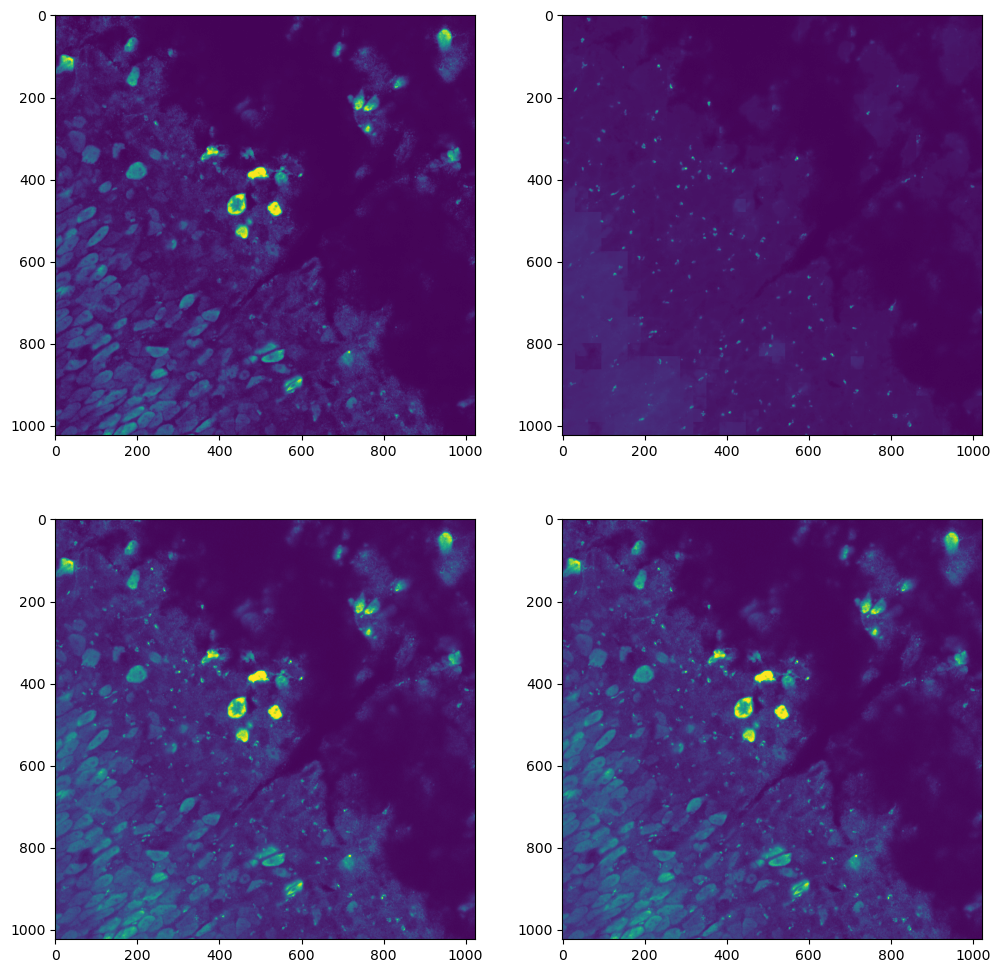

In [44]:
_,ax = plt.subplots(figsize=(12,12),ncols=2,nrows=2)
idx = np.random.randint(len(pred))
print(idx)
if isinstance(pred, np.ndarray):
    ax[0,0].imshow(pred[idx,:,:,0])
    ax[0,1].imshow(pred[idx,:,:,1])
    ax[1,0].imshow(tar1[idx,:,:])
    ax[1,1].imshow(tar2[idx,:,:])
    print(pred.shape)
else:
    ax[0,0].imshow(pred[idx][0,:,:,0])
    ax[0,1].imshow(pred[idx][0,:,:,1])
    ax[1,0].imshow(tar1[idx][0,:,:])
    ax[1,1].imshow(tar2[idx][0,:,:])
    print(pred[0].shape)


In [45]:
# pred is already normalized. no need to do it. 
if isinstance(pred, np.ndarray):
    pred1, pred2 = pred[...,0].astype(np.float32), pred[...,1].astype(np.float32)
    pred_inp = (pred1 + pred2)/2
elif isinstance(pred, list):
    pred1_arr = []
    pred2_arr = []
    pred_inp_arr = []
    for i in range(len(pred)):
        pred1, pred2 = pred[i][...,0].astype(np.float32), pred[i][...,1].astype(np.float32)
        pred_inp = (pred1 + pred2)/2
        pred1_arr.append(pred1)
        pred2_arr.append(pred2)
        pred_inp_arr.append(pred_inp)
    pred1 = pred1_arr
    pred2 = pred2_arr
    pred_inp = pred_inp_arr

In [46]:
if isinstance(pred, np.ndarray):
    ch1_pred_unnorm = pred[...,0]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy()
    ch2_pred_unnorm = pred[...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy()
elif isinstance(pred, list):
    ch1_pred_unnorm = []
    ch2_pred_unnorm = []
    for i in range(len(pred)):
        ch1_pred_unnorm.append(pred[i][...,0]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy())
        ch2_pred_unnorm.append(pred[i][...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy())

In [47]:
pred1[0].shape

(1, 1024, 1024)

In [48]:
tar[i].shape, ch1_pred_unnorm[0].shape

((1, 1024, 1024, 2), (1, 1024, 1024))

In [49]:
if config.model.model_type == ModelType.LadderVaeSemiSupervised:
    raise NotImplementedError("SSIM is incorrectly implemented here.")
    pred_inp = pred[...,2].astype(np.float32)
#     tar1 is the input. tar2 is the target. 
    rmse1 =np.sqrt(((pred1 - tar2)**2).reshape(len(pred1),-1).mean(axis=1))
    rmse2 =np.sqrt(((pred_inp - tar1)**2).reshape(len(pred2),-1).mean(axis=1)) 

    rmse = (rmse1 + rmse2)/2
    rmse = np.round(rmse,3)

    ssim1_mean, ssim1_std = avg_ssim(tar2, pred1)
    ssim2_mean, ssim2_std = avg_ssim(tar1, pred_inp)
    
    psnr1 = avg_psnr(tar2, pred1)
    psnr2 = avg_psnr(tar1, pred_inp)
    rinv_psnr1 = avg_range_inv_psnr(tar2, pred1)
    rinv_psnr2 = avg_range_inv_psnr(tar1, pred_inp)
    
elif isinstance(pred, np.ndarray):
    rmse1 =np.sqrt(((pred1 - tar1)**2).reshape(len(pred1),-1).mean(axis=1))
    rmse2 =np.sqrt(((pred2 - tar2)**2).reshape(len(pred2),-1).mean(axis=1)) 

    rmse = (rmse1 + rmse2)/2
    rmse = np.round(rmse,3)
    psnr1 = avg_psnr(tar1, pred1) 
    psnr2 = avg_psnr(tar2, pred2)
    rinv_psnr1 = avg_range_inv_psnr(tar1, pred1)
    rinv_psnr2 = avg_range_inv_psnr(tar2, pred2)
    ssim1_mean, ssim1_std = avg_ssim(tar[...,0], ch1_pred_unnorm)
    ssim2_mean, ssim2_std = avg_ssim(tar[...,1], ch2_pred_unnorm)
elif isinstance(pred, list):
    ssim1_mean_arr = []
    ssim1_std_arr = []
    ssim2_mean_arr = []
    ssim2_std_arr = []
    psnr1_arr = []
    psnr2_arr = []
    rinv_psnr1_arr = []
    rinv_psnr2_arr = []
    rmse_arr = []

    for i in range(len(pred)):
        rmse1 =np.sqrt(((pred1[i] - tar1[i])**2).reshape(len(pred1[i]),-1).mean(axis=1))
        rmse2 =np.sqrt(((pred2[i] - tar2[i])**2).reshape(len(pred2[i]),-1).mean(axis=1)) 

        rmse = (rmse1 + rmse2)/2
        rmse = np.round(rmse,3)
        psnr1 = avg_psnr(tar1[i], pred1[i]) 
        psnr2 = avg_psnr(tar2[i], pred2[i])
        rinv_psnr1 = avg_range_inv_psnr(tar1[i], pred1[i])
        rinv_psnr2 = avg_range_inv_psnr(tar2[i], pred2[i])
        ssim1_mean, ssim1_std = avg_ssim(tar[i][...,0], ch1_pred_unnorm[i])
        ssim2_mean, ssim2_std = avg_ssim(tar[i][...,1], ch2_pred_unnorm[i])
        ssim1_mean_arr.append(ssim1_mean)
        ssim1_std_arr.append(ssim1_std)
        ssim2_mean_arr.append(ssim2_mean)
        ssim2_std_arr.append(ssim2_std)
        psnr1_arr.append(psnr1)
        psnr2_arr.append(psnr2)
        rinv_psnr1_arr.append(rinv_psnr1)
        rinv_psnr2_arr.append(rinv_psnr2)
        rmse_arr.append(rmse)
    
    ssim1_mean = np.mean(ssim1_mean_arr)
    ssim1_std = np.mean(ssim1_std_arr)
    ssim2_mean = np.mean(ssim2_mean_arr)
    ssim2_std = np.mean(ssim2_std_arr)
    psnr1 = np.round(np.mean(psnr1_arr),2)
    psnr2 = np.round(np.mean(psnr2_arr),2)
    rinv_psnr1 = np.round(np.mean(rinv_psnr1_arr),2)
    rinv_psnr2 = np.round(np.mean(rinv_psnr2_arr),2)
    rmse = np.mean(rmse_arr)
    


In [50]:
print(f'{DataSplitType.name(eval_datasplit_type)}_P{custom_image_size}_G{image_size_for_grid_centers}_M{mmse_count}_Sk{ignored_last_pixels}')
print('Rec Loss',np.round(rec_loss.mean(),3) )
print('RMSE', np.mean(rmse1).round(3), np.mean(rmse2).round(3), np.mean(rmse).round(3))
print('PSNR', psnr1, psnr2)
print('RangeInvPSNR',rinv_psnr1, rinv_psnr2 )
print('SSIM',round(ssim1_mean,3), round(ssim2_mean,3),'±',round((ssim1_std + ssim2_std)/2,4))
print()

Test_P64_G32_M1_Sk[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Rec Loss 9.624
RMSE 1.307 1.286 1.208
PSNR 21.08 21.22
RangeInvPSNR 32.4 22.23
SSIM 0.878 0.727 ± 0.0



In [51]:
# Test_P64_G32_M1_Sk32
# Rec Loss 1.15
# RMSE 0.839 0.038 0.439
# PSNR 21.52 42.86
# RangeInvPSNR 21.52 42.88
# SSIM 0.427 0.819 ± 0.0

In [52]:
# Test_P64_G32_M1_Sk32
# Rec Loss -0.45
# RMSE 0.218 0.15 0.184
# PSNR 31.69 31.57
# RangeInvPSNR 31.7 31.6
# SSIM 0.757 0.658 ± 0.0033

In [53]:
!ls -lhrt Act*

ls: cannot access 'Act*': No such file or directory


In [54]:
if config.model.model_type == ModelType.LadderVaeSemiSupervised:
    from disentangle.analysis.plot_utils import add_pixel_kde
    inset_rect=[0.1,0.1,0.4,0.2]
    min_labelsize = 15

    nimgs=5
    crp_sz = 400
    img_sz = 8

    _,ax = plt.subplots(figsize=(4*img_sz,img_sz*nimgs),ncols=5,nrows=nimgs)
    clean_ax(ax[1:,])
    clean_ax(ax[:,1:])
    img_idx_list = np.random.permutation(np.arange(len(tar1)))[:nimgs] #[19,23,15,18,4] # 
    for ax_idx in range(nimgs):
        img_idx = img_idx_list[ax_idx]
        overlapping_pred = pred1[img_idx] + pred2[img_idx]
        overlapping_min = min(tar1[img_idx].min(),overlapping_pred.min())
        overlapping_max = max(tar1[img_idx].max(),overlapping_pred.max())

        ax[ax_idx,0].imshow(tar1[img_idx])#,vmin=overlapping_min,vmax=overlapping_max)
        ax[ax_idx,1].imshow(overlapping_pred)#,vmin=overlapping_min,vmax=overlapping_max)

        ch1_min = tar2[img_idx].min()#,pred1[img_idx].min())
        ch1_max = tar2[img_idx].max()#,pred1[img_idx].max())
        ax[ax_idx,2].imshow(tar2[img_idx])#,vmin=ch1_min,vmax=ch1_max)
        ax[ax_idx,3].imshow(pred1[img_idx])#,vmin=ch1_min,vmax=ch1_max)

        ax[ax_idx,4].imshow(pred2[img_idx])
        ax[ax_idx,0].set_ylabel(f'{img_idx}',fontsize=min_labelsize)

        # add_pixel_kde(ax[ax_idx,1],
        #               inset_rect,
        #               tar1 [img_idx],
        #               data2 =overlapping_pred,
        #              min_labelsize=min_labelsize)
        
        # add_pixel_kde(ax[ax_idx,3],
        #               inset_rect,
        #               tar2 [img_idx],
        #               data2 =pred1[img_idx],
        #              min_labelsize=min_labelsize)
        

    ax[0,0].set_title('Inp')
    ax[0,1].set_title('Recons')
    ax[0,2].set_title('GT 1')
    ax[0,3].set_title('Pred 1')
    ax[0,4].set_title('Pred 2')

#

### To save to tiff file.

In [55]:
# ch1_pred_unnorm = pred[...,0]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy()
# input_pred_unnorm = pred[...,2]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy()
# ch2_pred_unnorm = input_pred_unnorm - ch1_pred_unnorm
# ch2_pred_unnorm = pred[...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy() #ch2_pred_unnorm - ch2_pred_unnorm.min()

# ch1_pred_unnorm = ch1_pred_unnorm.astype(np.int32)
# input_pred_unnorm = input_pred_unnorm.astype(np.int32)
# ch2_pred_unnorm = ch2_pred_unnorm.astype(np.int32)

# data = np.concatenate([val_dset._data[:,:480,:480], ch1_pred_unnorm[...,None],
# ch2_pred_unnorm[...,None], input_pred_unnorm[...,None]],
# axis=-1)

# import tifffile
# tifffile.imwrite("prediction2.tif", 
# np.swapaxes(data[:,None],1,4)[...,0].astype(np.uint16),
# imagej=True, 
# #  metadata={ 'axes': 'ZYXC'}, 
#  )

Showing for 4158


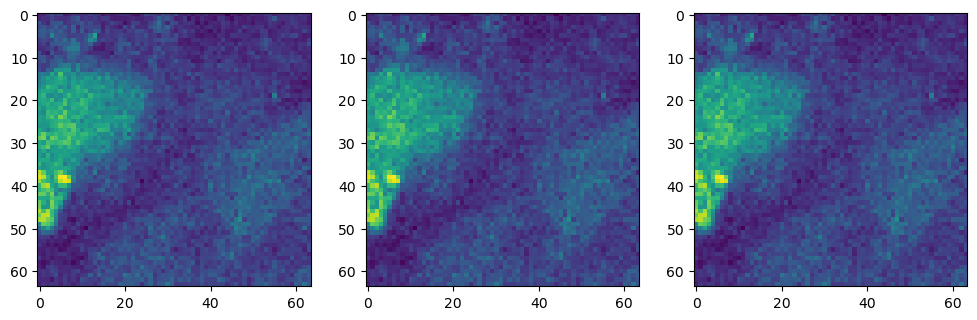

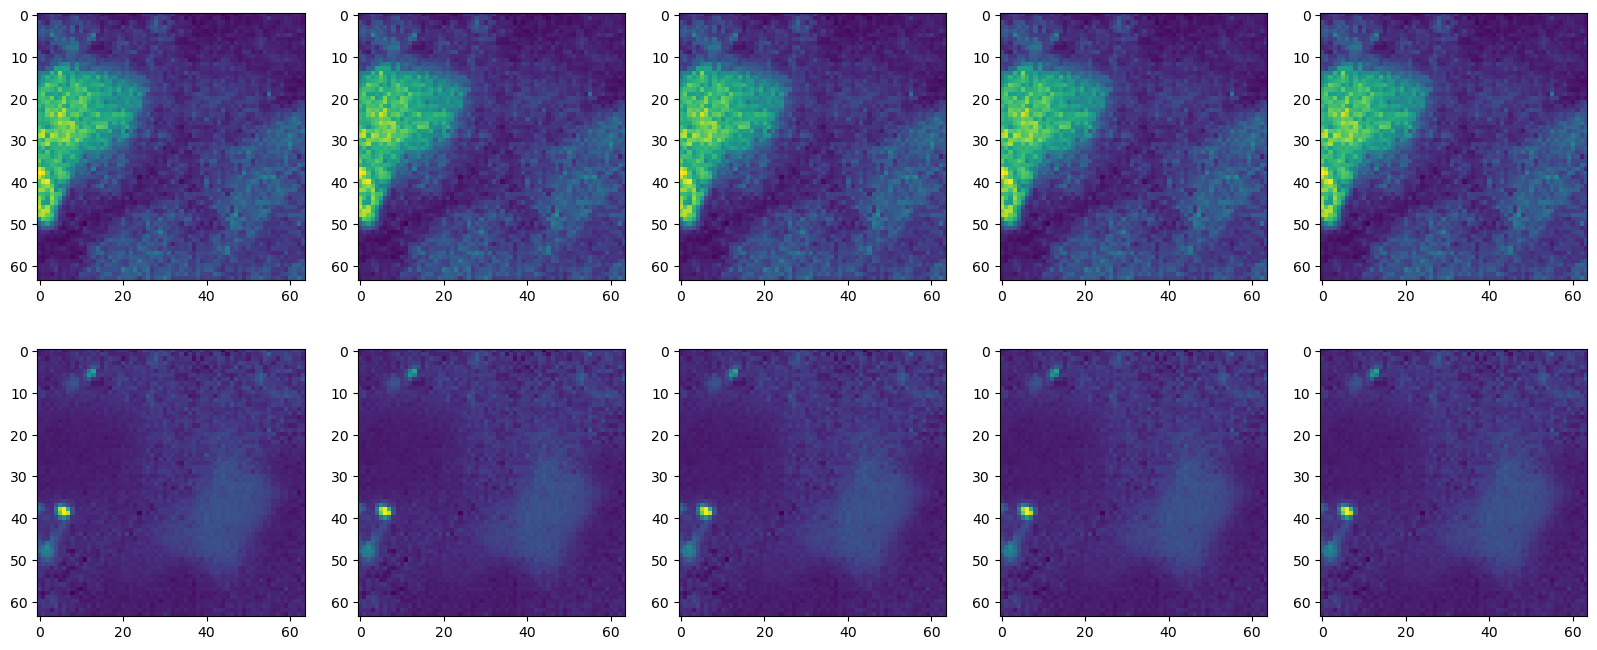

In [56]:
def show_for_one(idx):
    print(f'Showing for {idx}')
    with torch.no_grad():
        inp, tar = val_dset[idx]

        inp = torch.Tensor(inp[None])
        tar = torch.Tensor(tar[None])
        inp = inp.cuda()
        x_normalized = model.normalize_input(inp)
        tar = tar.cuda()
        tar_normalized = model.normalize_target(tar)

        recon_img_list = []
        for _ in range(5):
            if config.model.model_type == ModelType.UNet:
                recon_normalized = model(x_normalized)
                imgs = recon_normalized
            elif config.model.model_type == ModelType.LadderVaeSemiSupervised:
                out, td_data = model(x_normalized)
                rec_loss, imgs = model.get_reconstruction_loss(out,
                                                               x_normalized,
                                                               tar_normalized,
                                                               return_predicted_img=True)
            else:
                recon_normalized, td_data = model(x_normalized)
                rec_loss, imgs = model.get_reconstruction_loss(recon_normalized, tar_normalized,
                                                               return_predicted_img=True)
            recon_img_list.append(imgs.cpu().numpy()[0])

    _,ax = plt.subplots(figsize=(12,4),ncols=3)
    ax[0].imshow(inp[0,0].cpu().numpy())
    ax[1].imshow(tar[0,0].cpu().numpy())
    if tar.shape[1] ==2:
        ax[2].imshow(tar[0,1].cpu().numpy())

    _,ax = plt.subplots(figsize=(20,8),ncols=5,nrows=2)
    for i in range(5):
        ax[0,i].imshow(recon_img_list[i][0])
        ax[1,i].imshow(recon_img_list[i][1])

show_for_one(np.random.randint(len(val_dset)))

## Creating tiff file

In [57]:
rdate,rconfig,rid = ckpt_dir.split("/")[-3:]
fname_prefix = rdate + '-' + rconfig.replace('-','')[:-2] + '-' + rid
fname_prefix

'2311-D17M3S0-4'

In [58]:
from skimage.io import imsave
import numpy as np
pred_unnorm = np.concatenate([ch1_pred_unnorm[...,None],
                              ch2_pred_unnorm[...,None]],
                              axis=-1)
for ch_idx in [0,1]:
    tif_fname = f'{fname_prefix}_P{custom_image_size}_G{image_size_for_grid_centers}_M{mmse_count}_Sk{ignored_last_pixels}_C{ch_idx}.tif'
    tif_fpath=os.path.join('paper_tifs',tif_fname)
    if config.data.data_type in [DataType.CustomSinosoid, DataType.CustomSinosoidThreeCurve]:
        output = np.concatenate([
                            pred_unnorm[None,:50,...,ch_idx],tar[None,:50,...,ch_idx],
        ],axis=0)
    else:
        output = np.concatenate([
                                pred_unnorm[:1,...,ch_idx],tar[:1,...,ch_idx],
        ],axis=0)
    imsave(tif_fpath,output,plugin='tifffile')
    print(tif_fpath)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
! ls -lhrt paper_tifs/2211-D8M3S0-*

In [ ]:
# !ls paper_tifs/2211-D3M3S0-0_P64_G*

In [ ]:
idx = np.random.randint(len(val_dset))
inp, tar = val_dset[idx]

In [ ]:
if len(inp) > 1:
    _,ax = plt.subplots(figsize=(10,2.5),ncols=4)
    ax[0].imshow(inp[0])
    ax[1].imshow(inp[1])
    ax[2].imshow(inp[2])
    ax[3].imshow(inp[3])

In [ ]:
tar_unnorm.shape

In [ ]:
# _,ax = plt.subplots(figsize=(10,10))
# tmp_data =tar_unnorm[idx,:,:,1]
# q = np.quantile(tmp_data,0.95)
# tmp_data[tmp_data >q] = q
# plt.imshow(tmp_data)

In [ ]:
pred_unnorm.min()

In [ ]:
idx =  np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,20),ncols=2,nrows=2)
ax[0,0].set_title('Channel 1',size=20)
ax[0,1].set_title('Channel 2',size=20)
ax[0,0].set_ylabel('Target',size=20)
ax[1,0].set_ylabel('Predictions',size=20)
ax[0,0].imshow(tar_unnorm[idx,:,:,0])
ax[0,1].imshow(tar_unnorm[idx,:,:,1])
ax[1,0].imshow(pred_unnorm[idx,:,:,0])
ax[1,1].imshow(pred_unnorm[idx,:,:,1])

In [ ]:
idx =  0#np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,30),ncols=2,nrows=3)
ax[0,0].set_title('Target',size=20)
ax[0,1].set_title('Prediction',size=20)
ax[0,0].set_ylabel('Mixed Input',size=20)
ax[1,0].set_ylabel('Channel 1',size=20)
ax[2,0].set_ylabel('Channel 2',size=20)
sz = 400
ax[0,0].imshow(np.mean(tar_unnorm[idx, 1000:1000+sz,400:400+sz], axis=2))
ax[0,1].imshow(np.mean(pred_unnorm[idx,1000:1000+sz,400:400+sz], axis=2))

ax[1,0].imshow(tar_unnorm[idx, 1000:1000+sz,400:400+sz,0],vmax=126,vmin=88)
ax[1,1].imshow(pred_unnorm[idx,1000:1000+sz,400:400+sz,0], vmax=126,vmin=88)

ax[2,0].imshow(tar_unnorm[idx, 1000:1000+sz,400:400+sz,1],vmax=126,vmin=78)
ax[2,1].imshow(pred_unnorm[idx,1000:1000+sz,400:400+sz,1],vmax=126,vmin=78)

In [ ]:
tar_unnorm[idx, 1000:1500,400:900,0].std()

In [ ]:
pred_unnorm[idx,1000:1500,400:900,0].std()

In [ ]:
idx =  np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,30),ncols=2,nrows=3)
ax[0,0].set_title('Target',size=20)
ax[0,1].set_title('Prediction',size=20)
ax[0,0].set_ylabel('Mixed Input',size=20)
ax[1,0].set_ylabel('Channel 1',size=20)
ax[2,0].set_ylabel('Channel 2',size=20)

ax[0,0].imshow(np.mean(tar_unnorm[idx, 1000:1500,400:900], axis=2))
ax[0,1].imshow(np.mean(pred_unnorm[idx,1000:1500,400:900], axis=2))

ax[1,0].imshow(tar_unnorm[idx, 1000:1500,400:900,0])
ax[1,1].imshow(pred_unnorm[idx,1000:1500,400:900,0])

ax[2,0].imshow(tar_unnorm[idx, 1000:1500,400:900,1])
ax[2,1].imshow(pred_unnorm[idx,1000:1500,400:900,1])

In [ ]:
break here

## Comparing PSNR with high res data. 

In [ ]:
from disentangle.core.data_split_type import  get_datasplit_tuples

In [ ]:
if eval_datasplit_type == DataSplitType.Val:
    N = len(pred1)/config.training.val_fraction
elif eval_datasplit_type == DataSplitType.Test:
    N = len(pred1)/config.training.test_fraction
train_idx,val_idx,test_idx = get_datasplit_tuples(config.training.val_fraction,config.training.test_fraction,N,
                                          starting_train=False)

In [ ]:
from disentangle.core.tiff_reader import load_tiff

In [ ]:
highres_actin = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif')[...,None]
highres_mito = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/mito-60x-noise2-highsnr.tif')[...,None]

if eval_datasplit_type == DataSplitType.Val:
    highres_data = np.concatenate([highres_actin[val_idx[0]:val_idx[1]],
                                   highres_mito[val_idx[0]:val_idx[1]]],
                                  axis=-1).astype(np.float32)
elif eval_datasplit_type == DataSplitType.Test:
    highres_data = np.concatenate([highres_actin[test_idx[0]:test_idx[1]],
                                   highres_mito[test_idx[0]:test_idx[1]]],
                                  axis=-1).astype(np.float32)

In [ ]:
thresh = np.quantile(highres_data,config.data.clip_percentile)
highres_data[highres_data > thresh]=thresh
    

In [ ]:
_,ax = plt.subplots(figsize=(8,8),ncols=2,nrows=2)
ax[0,0].imshow(tar_unnorm[5,...,0])
ax[0,1].imshow(highres_data[5,...,0])
ax[1,0].imshow(tar_unnorm[8,...,1])
ax[1,1].imshow(highres_data[8,...,1])


In [ ]:
print('PSNR with HighRes', avg_psnr(highres_data[...,0], pred1),avg_psnr(highres_data[...,1], pred2))
print('RangeInvPSNR with HighRes', avg_range_inv_psnr(highres_data[...,0], pred1), 
      avg_range_inv_psnr(highres_data[...,1], pred2))


In [ ]:
# RangeInvPSNR with HighRes 16.82 18.33


In [ ]:
tar_1_tmp.dtype

In [ ]:
from disentangle.core.psnr import fix_range, zero_mean
def fix_range_with_highresdata(pred,tar):
    pred_1_tmp = torch.Tensor(pred.reshape(len(pred),-1))
    tar_1_tmp = torch.Tensor(tar.reshape(len(tar),-1))
    pred_1_tmp = zero_mean(pred_1_tmp)
    tar_1_tmp = zero_mean(tar_1_tmp)
#     import pdb;pdb.set_trace()
    tar_1_tmp = tar_1_tmp / torch.std(tar_1_tmp, dim=1, keepdim=True)
    
    pred_1_tmp = fix_range(tar_1_tmp,pred_1_tmp)
    pred_1_tmp = pred_1_tmp.reshape_as(torch.Tensor(pred))
    tar_1_tmp = tar_1_tmp.reshape_as(torch.Tensor(pred))
    return pred_1_tmp, tar_1_tmp

In [ ]:
pred1_tmp, tar1_tmp = fix_range_with_highresdata(pred1, highres_data[...,0])
pred2_tmp, tar2_tmp = fix_range_with_highresdata(pred2, highres_data[...,1])

In [ ]:
ssim1_mean, ssim1_std = avg_ssim(tar1_tmp.numpy(), pred1_tmp.numpy())
ssim2_mean, ssim2_std = avg_ssim(tar2_tmp.numpy(), pred2_tmp.numpy())
print(ssim1_mean, ssim2_mean)

In [ ]:
_,ax = plt.subplots(figsize=(8,4),ncols=2)
ax[0].imshow(pred_1_tmp[0])
ax[1].imshow(tar_1_tmp[0])


In [ ]:
break here.

## Inspecting the performance on grid boundaries.


In [ ]:
from disentangle.analysis.stitch_prediction import stitched_prediction_mask


skip_boundary_pixel_count = 0
for sk_c in [1,16,32,48,56]:
    mask = stitched_prediction_mask(val_dset, 
                                (val_dset._img_sz,val_dset._img_sz), 
                                skip_boundary_pixel_count, 
                                sk_c)
    mask = ignore_pixels(mask)
    psnr1, psnr2 = compute_masked_psnr(mask, tar1,tar2,pred1,pred2)
    print(f'[Pad:{val_dset.per_side_overlap_pixelcount()}] SkipCentral', sk_c,
          psnr1,psnr2)

In [ ]:
plt.imshow(mask[0,:,:,0])

## Inspecting the performance on central regions

In [ ]:
skip_central_pixel_count = 0

for sk_b in [1,8,16,20,24]:
    mask = stitched_prediction_mask(val_dset, 
                                (val_dset._img_sz,val_dset._img_sz), 
                                sk_b, 
                                skip_central_pixel_count)
    mask = ignore_pixels(mask)
    psnr1, psnr2 = compute_masked_psnr(mask, tar1,tar2,pred1,pred2)
    print(f'[Pad:{val_dset.per_side_overlap_pixelcount()}] SkipBoundary', sk_b, psnr1,psnr2)

In [ ]:
plt.imshow(mask[0,:,:,0])

In [ ]:
# for w in range(2,202,25):
#     print(f'RangeInvPSNR but skipping {w}', avg_range_inv_psnr(np.copy(tar1[:,w:-w,w:-w]), 
#                                                                np.copy(pred1[:,w:-w,w:-w])),
    
#                                             avg_range_inv_psnr(np.copy(tar2[:,w:-w,w:-w]), 
#                                                                np.copy(pred2[:,w:-w,w:-w]).copy()))

In [ ]:
h = 1200
w = 1200
sz = 512
x = tar_unnorm[:1,h:h+sz,w:w+sz].mean(axis=3)

In [ ]:
p_count = 32
y1 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]))
y2 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]), constant_values=237)
y3 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]), mode='linear_ramp', end_values=237)
y4 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]),mode='reflect')


In [ ]:
np.quantile(x, [0,0.05, 0.1])

In [ ]:
_,ax = plt.subplots(figsize=(16,4),ncols=4)
ax[0].imshow(y1[0], )
ax[1].imshow(y2[0], )
ax[2].imshow(y3[0], )
ax[3].imshow(y4[0], )

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(tar_unnorm[0,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(tar_unnorm[0,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(tar_unnorm[-1,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(tar_unnorm[-1,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(pred_unnorm[0,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(pred_unnorm[0,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
import matplotlib.ticker as ticker
# import seaborn.apionly as sns

_,ax = plt.subplots(figsize=(20,4))
sns.histplot(tar_unnorm[-1,:,:].mean(axis=2).reshape(-1,))
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

In [ ]:
tar_unnorm[-1,:,:].shape

In [ ]:
# inp, tar = val_dset[11060]

In [ ]:
# _,ax = plt.subplots(figsize=(16,4),ncols=4)
# ax[0].imshow(inp[0])
# ax[1].imshow(inp[1])
# ax[2].imshow(inp[2])
# ax[3].imshow(inp[3])

In [ ]:
# _,ax = plt.subplots(figsize=(8,4),ncols=2)
# ax[0].imshow(tar[0])
# ax[1].imshow(tar[1])

## Inspecting the difference in behaviour when different sized inputs are passed. 

In [ ]:
import seaborn as sns
def compute_centered_diff(big,small):
    pad = (big.shape[-1] - small.shape[-1])//2
#     import pdb;pdb.set_trace()
    return big[:,:,pad:-pad,pad:-pad] - small
 
old_img_sz = val_dset.get_img_sz()
val_dset.set_img_sz(128)
inp2, tar2 = val_dset[10000]
with torch.no_grad():
    bu_values2 = model.bottomup_pass(torch.Tensor(inp2[None]).cuda())

val_dset.set_img_sz(256)
inp3, tar3 = val_dset[10000]
with torch.no_grad():
    bu_values3 = model.bottomup_pass(torch.Tensor(inp3[None]).cuda())

diff = (bu_values2[0] - bu_values3[0][:,:,32:-32,32:-32]).cpu().numpy()
sns.histplot(diff.reshape(-1,))

##LOOKING AT bu_values
idx=1
diff = compute_centered_diff(bu_values3[idx],bu_values2[idx]).cpu().numpy()
_,ax =plt.subplots(figsize=(10,10))
sns.heatmap(diff[0,0])

## Looking at the difference in prediction.
with torch.no_grad():
    out2,_ = model(torch.Tensor(inp2[None,]).cuda())
    out3,_ = model(torch.Tensor(inp3[None,]).cuda())
    img2 = get_img_from_forward_output(out3,model)
    img3 = get_img_from_forward_output(out2,model)
diff = compute_centered_diff(img2,img3)
_,ax =plt.subplots(figsize=(10,10))
sns.heatmap(diff[0,1].cpu().numpy())
val_dset.set_img_sz(old_img_sz)


In [ ]:
from disentangle.core.tiff_reader import load_tiff

In [ ]:
img = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif')

In [ ]:
img.shape

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=4)
ax[0].imshow(img[0])
ax[1].imshow(img[1])
ax[2].imshow(img[2])
ax[3].imshow(img[3])

In [ ]:
img2 =load_tiff('/home/ashesh.ashesh/data/microscopy/OptiMEM100x014.tif')

In [ ]:
img2.shape

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=4)
ax[0].imshow(img2[0,...,0])
ax[1].imshow(img2[1,...,0])
ax[2].imshow(img2[2,...,0])
ax[3].imshow(img2[3,...,0])

###### 

In [ ]:
inp, tar = val_dset[0]

In [ ]:
inp.shape

In [ ]:
# _,ax = plt.subplots(figsize=(3,3))
plt.imshow(tar[0])

In [ ]:
plt.imshow(inp[0])

In [ ]:
(0.436+0.810)/2